In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from preprocess import get_prepared_data

# Load and prepare data
X, y = get_prepared_data(oversample=True, shuffle=True)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [14]:
def find_best_mapping(original_labels, predicted_labels):
    # For binary labels, there are only two possible mappings
    mapping1 = np.array([0, 1])
    mapping2 = np.array([1, 0])
    
    remapped1 = mapping1[predicted_labels]
    remapped2 = mapping2[predicted_labels]
    
    loss1 = np.sum(np.abs(original_labels - remapped1))
    loss2 = np.sum(np.abs(original_labels - remapped2))
    
    return mapping1 if loss1 < loss2 else mapping2
    

# Find the best mapping and apply it
best_mapping = find_best_mapping(y, kmeans.labels_)
y_pred = best_mapping[kmeans.labels_]

Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      9108
           1       0.99      0.21      0.35      9108

    accuracy                           0.59     18216
   macro avg       0.77      0.59      0.50     18216
weighted avg       0.77      0.59      0.50     18216



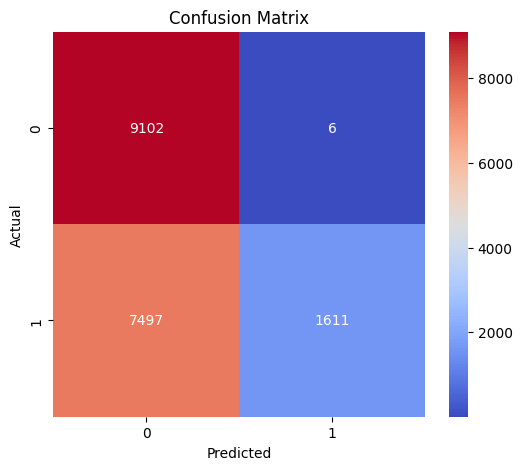

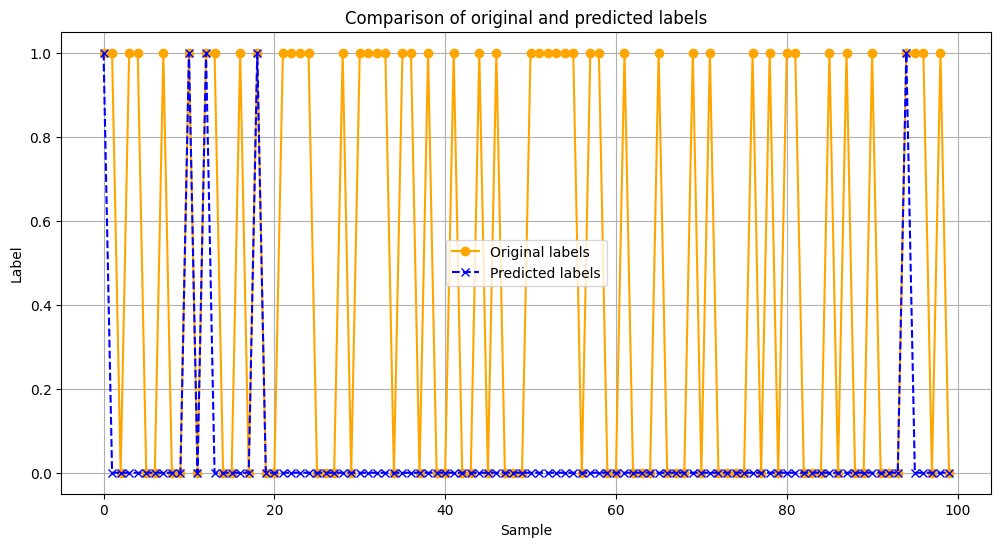

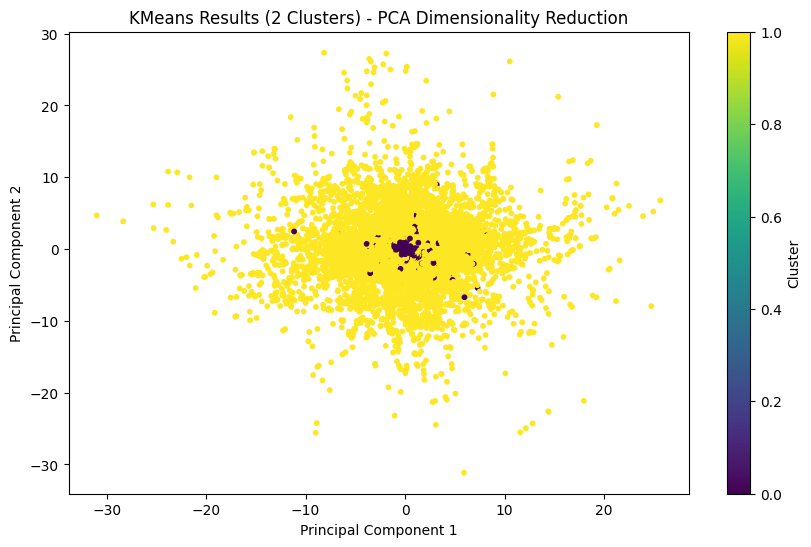

In [15]:
# Calculate and print metrics
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y, y_pred))


def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


plot_confusion_matrix(y, y_pred)

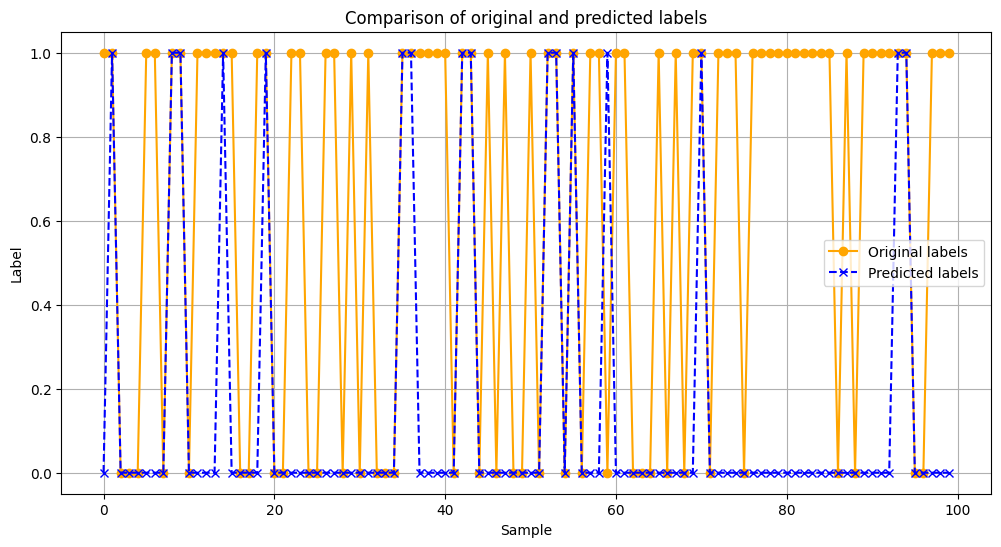

In [5]:
# Plot comparison of original and predicted labels
num_samples_to_plot = 100
indices = np.arange(num_samples_to_plot)
original_labels = y[:num_samples_to_plot]
predicted_labels = y_pred[:num_samples_to_plot]

plt.figure(figsize=(12, 6))
plt.plot(indices, original_labels, marker='o', linestyle='-', color='orange', label='Original labels')
plt.plot(indices, predicted_labels, marker='x', linestyle='--', color='blue', label='Predicted labels')
plt.xlabel("Sample")
plt.ylabel("Label")
plt.title("Comparison of original and predicted labels")
plt.legend()
plt.grid(True)
plt.show()